<a href="https://colab.research.google.com/github/dim-tsoukalas/visa-approval-facilitation/blob/main/EasyVisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Advanced Machine Learning - Project Debrief</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
# Connect to google drive

# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
df = pd.read_csv('EasyVisa.csv')

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
# View the first 5 rows of the dataset
df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [ ]:
# View the last 5 rows of the dataset
df.tail(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
# View the shape of the dataset
df.shape

(25480, 12)

* The data have 12 columns and 25480 rows

#### Check the data types of the columns for the dataset

In [ ]:
# View the not-null values and the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB




* We notice that none of the columns have null values
* The data types are object, int64 and float64


**Let's check the number of unique values in each column**

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000,25480.000,25480.000
mean,5667.043,1979.410,74455.815
std,22877.929,42.367,52815.942
min,-26.000,1800.000,2.137
25%,1022.000,1976.000,34015.480
50%,2109.000,1997.000,70308.210
75%,3504.000,2005.000,107735.513
max,602069.000,2016.000,319210.270




*   The `no_of_employees` has negative values, which has to be solved
*   Columns `yr_of_estab` and `prevailing_wage` seems that they have normal values, although they have outliers



#### Fixing the negative values in number of employees columns

In [ ]:
# Check negative rows
df[df['no_of_employees'] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.990,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.140,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.940,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.460,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.970,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.320,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.950,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.500,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.610,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.510,Year,Y,Certified


* We will transform these numbers to positive

In [ ]:
# Transform the negative numbers to positive
df.loc[df['no_of_employees'] < 0, 'no_of_employees'] = abs(df['no_of_employees'])

* No more negative values

In [ ]:
# Count the number of negative values
len(df[df['no_of_employees'] < 0])

0

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Get categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Print the number of unique values of each categorical column
df[cat_cols].nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
region_of_employment,5
unit_of_wage,4
full_time_position,2
case_status,2


* The column `case_id` can be dropped, hence it has a unique value for every row

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on number of employees

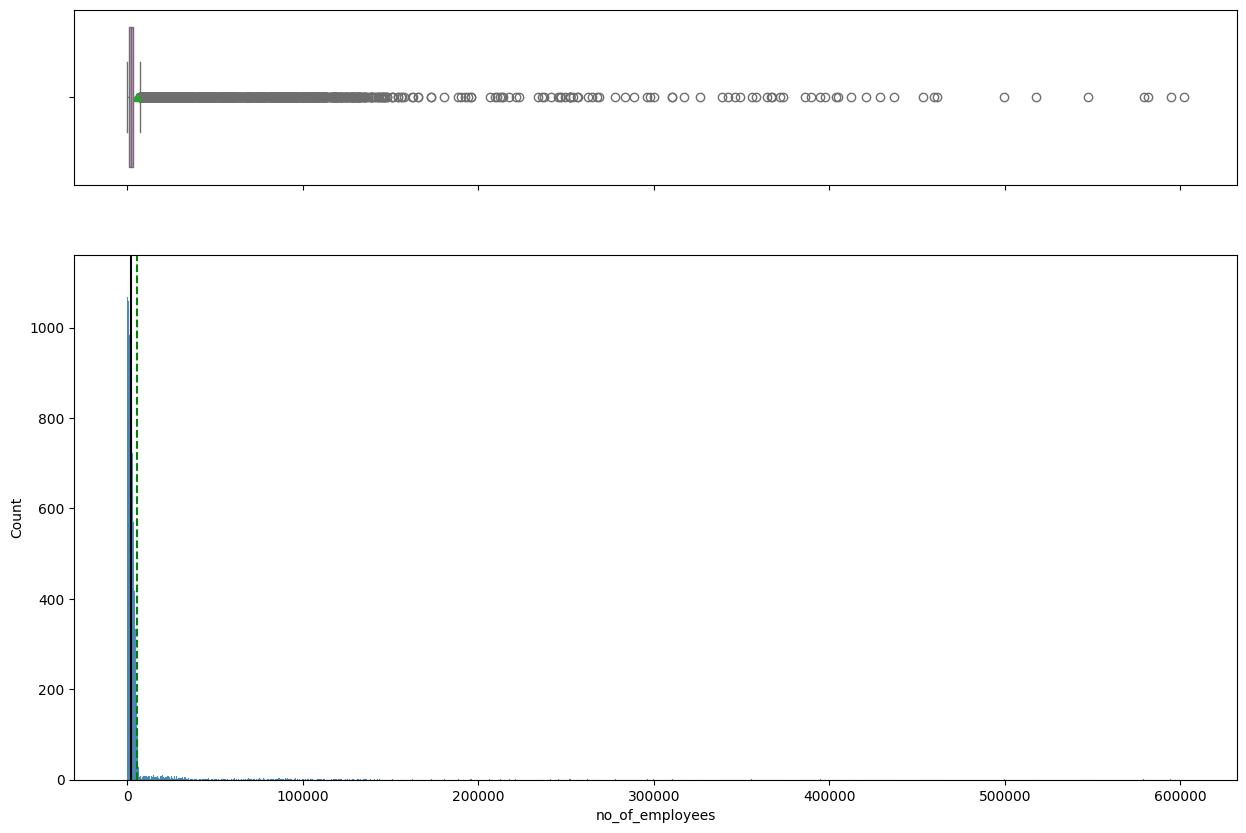

In [ ]:
# View the histogram and the boxplot of the Number of Employees
histogram_boxplot(df, 'no_of_employees')

* The distribution of the `no_of_employees` is right-skewed
* The boxplot shows that there are outliers at the right end
* We will not treat these outliers as they represent real data

#### Observations on Year in which the employer's company was established

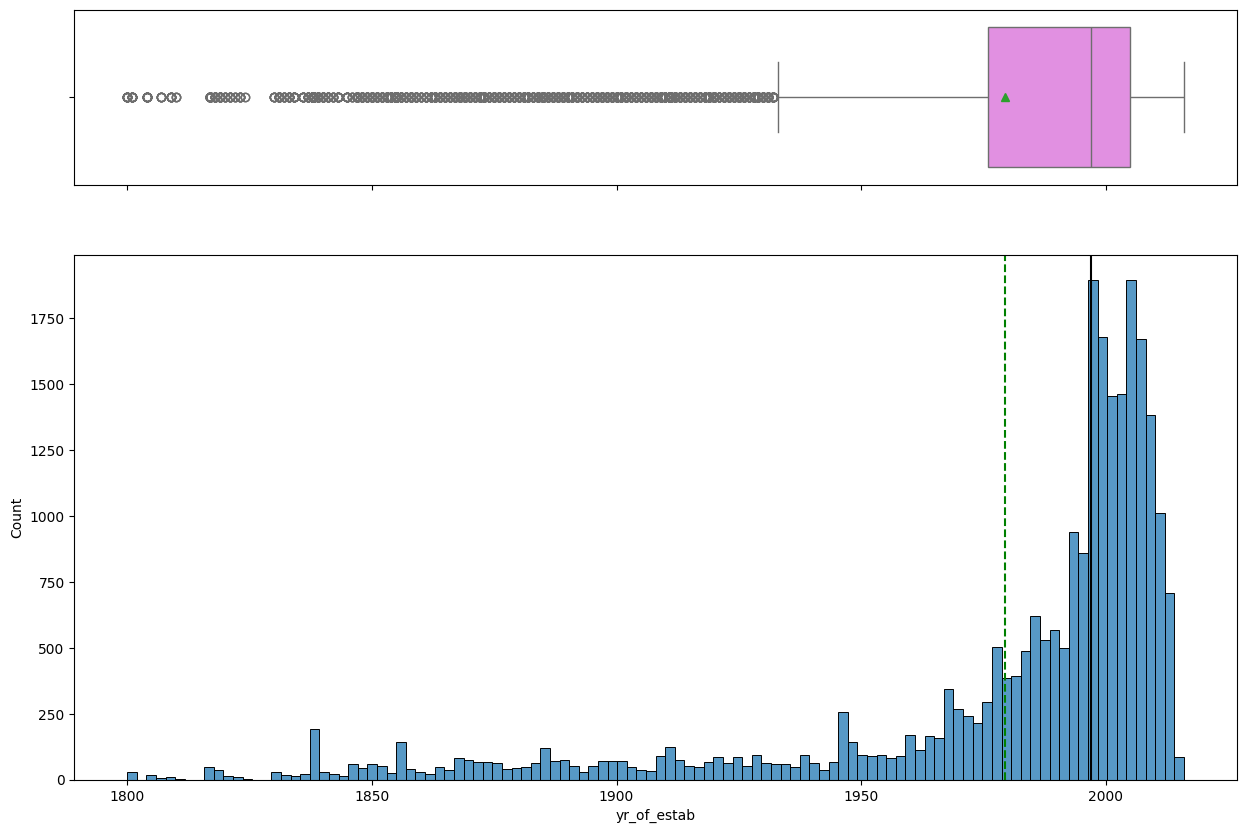

In [ ]:
# View the histogram and the boxplot of Year of Establish
histogram_boxplot(df, 'yr_of_estab')

* The distribution of the year of establishment of the comapny is left-skewed
* The boxplot shows that there are outliers at the left start
* We will not treat these outliers as they represent real data

#### Observations on prevailing wage

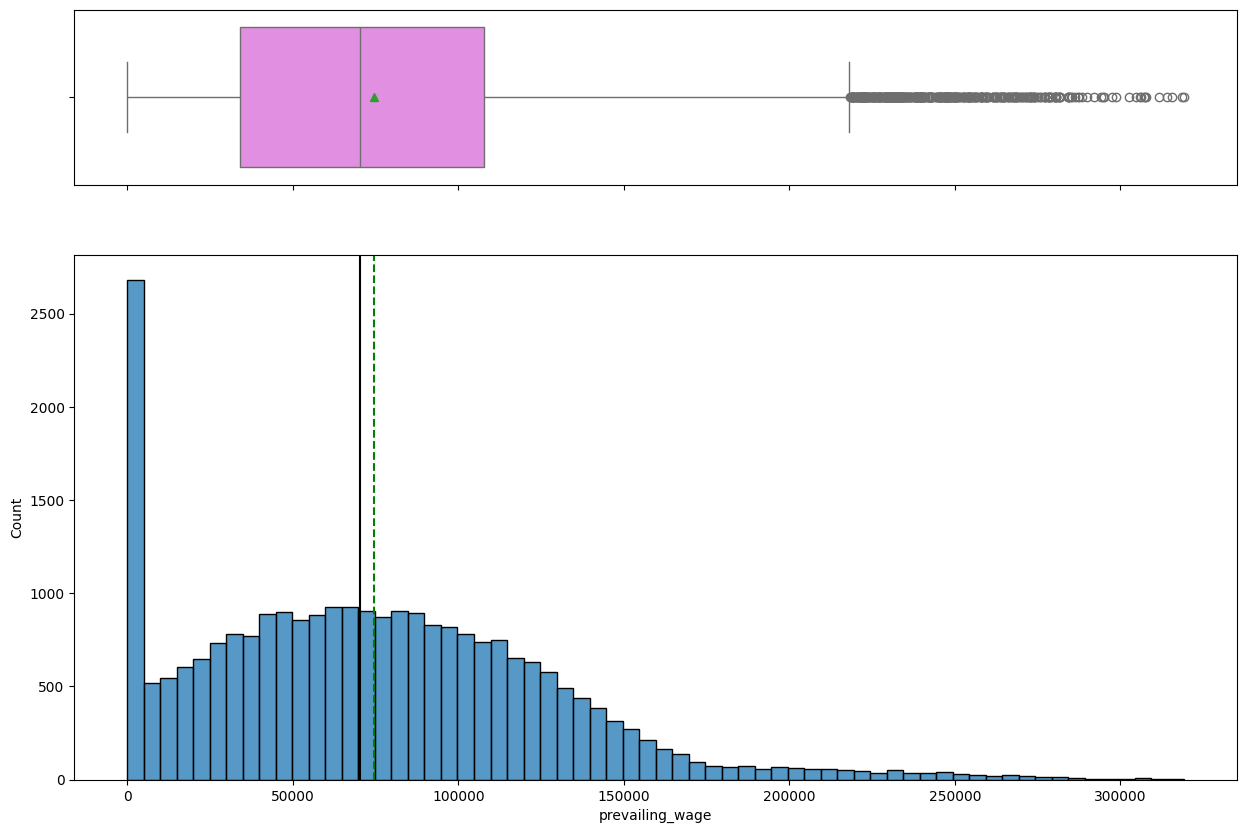

In [ ]:
# View the histogram and the boxplot of the Prevailing Wage
histogram_boxplot(df, 'prevailing_wage')

* The distribution of the prevailing wage is right skewed
* The boxplot shows that there are outliers in the right end
* We will not treat these outliers as they represent real data

#### Observations on continent of employee

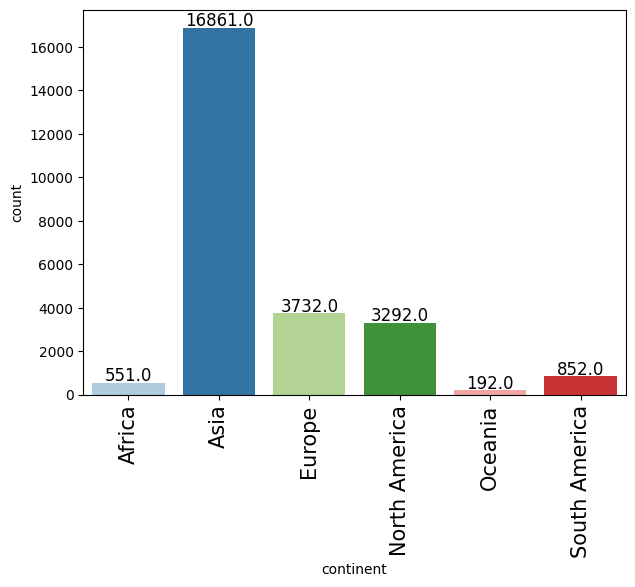

In [ ]:
# View the plot of continent of employee
labeled_barplot(df, 'continent')

* Majority of applicants i.e. 66% are from Asia
* Approx 14% are from Europe and 12% from North America
* There are very few observations, approx 5% from Oceania, South America or Africa

#### Observations on education of employee

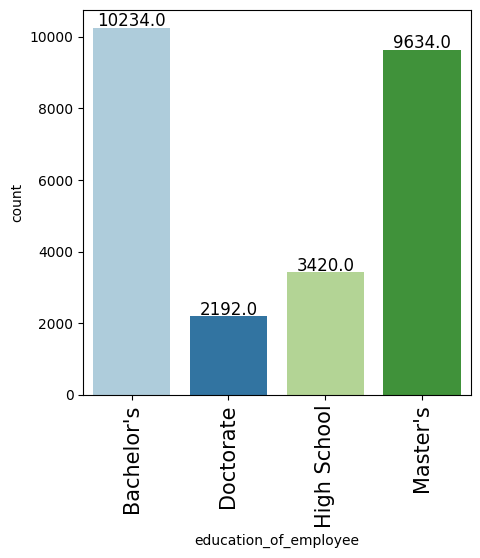

In [ ]:
# View the plot of education of employee
labeled_barplot(df, 'education_of_employee')

* Majority of applicants i.e. 79% have higher educaiton of Bachelor's or Master's Degree
* Approx 14% have High School education
* There are few observations, approx 9% with Doctorate

#### Observations on region of employment

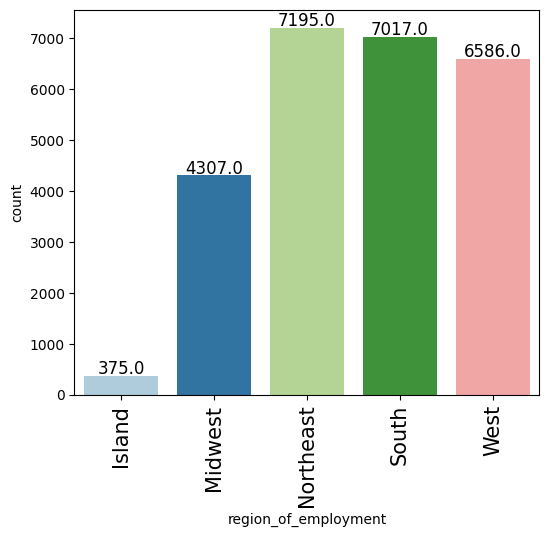

In [ ]:
# View the plot of region of employee
labeled_barplot(df, 'region_of_employment')

* Majority of applicants i.e. 28% is from Northeast, 28% is from SOuth, 26% is from West
* Approx 17% is from Midwest
* There are few observations, approx 1.5% from Island


#### Observations on job experience

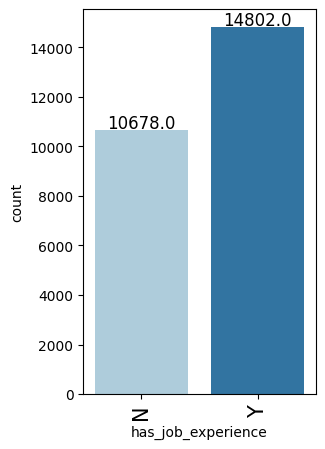

In [ ]:
# View the plot of job experience of employee
labeled_barplot(df, 'has_job_experience')

* Majority of applicants approx 58% have job experience
* Approx 42% doesn't have work experience

#### Observations on case status

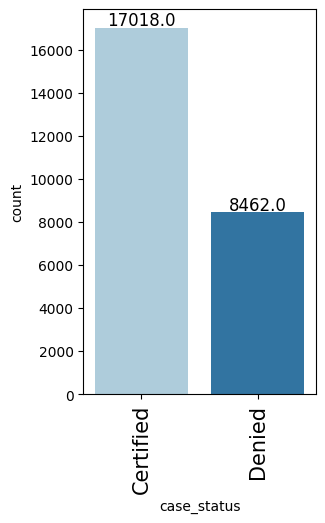

In [ ]:
# View the plot of Visa status of employee
labeled_barplot(df, 'case_status')

* The class distribution in the target variable is imbalanced.
* We have 67% observations for Certified and 33% observations for Denied.

#### Observations on job training

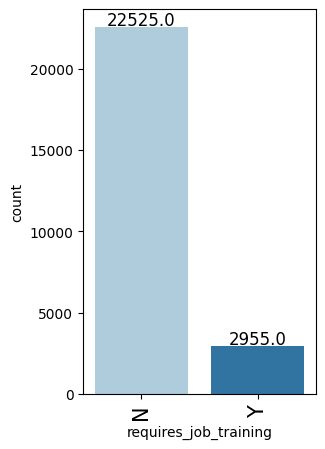

In [ ]:
# View the plot of job training of employee
labeled_barplot(df, 'requires_job_training')

* Mojority of the applicants i.e. 88% doesn't require job training
* Approx 11% requires job training

#### Observations on unit of wage

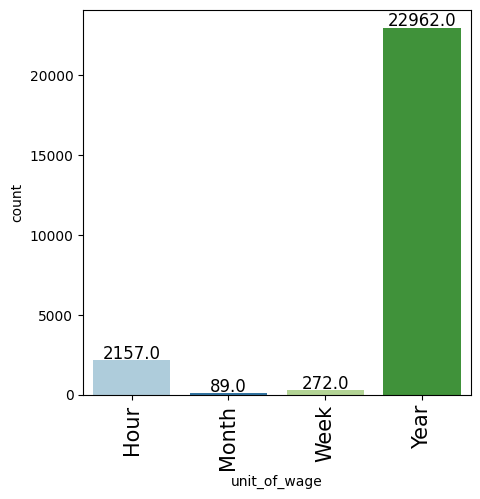

In [ ]:
# View the plot of unit of wage of employee
labeled_barplot(df, 'unit_of_wage')

* Majority of applicants i.e. 90% has yearly wage
* Approx 10% has Hourly, Monthly or Weekly

#### Observations on full time position

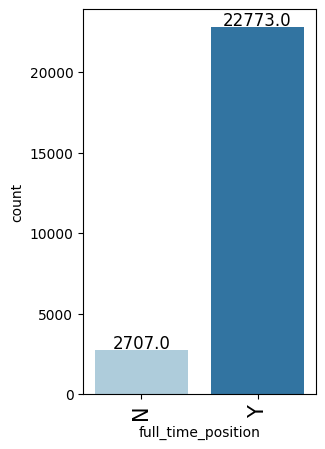

In [ ]:
# View the plot of full time position of employee
labeled_barplot(df, 'full_time_position')

* Mojority of the applicants i.e. 90% is full time position
* Approx 10% is not




### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


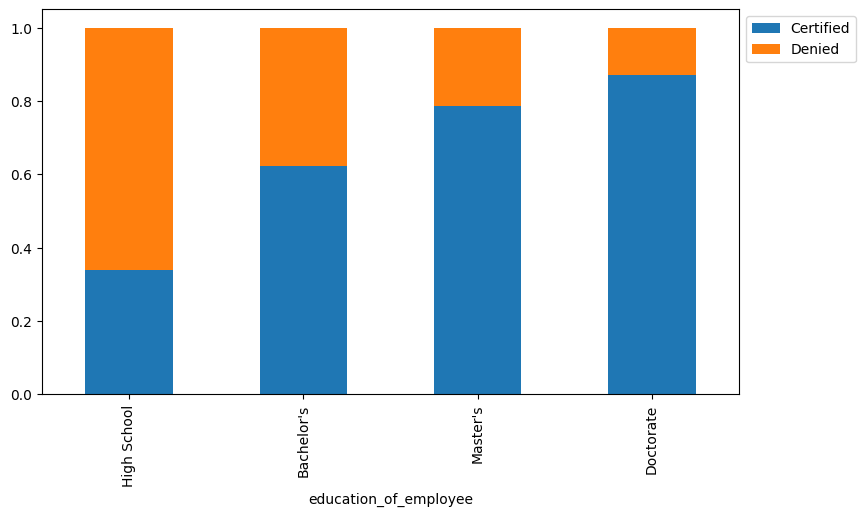

In [ ]:
# View the plot of continent of employee
stacked_barplot(df, 'education_of_employee', 'case_status')

* Education has clearly impact in visa certification
* Applicants with Doctorate, Bachelor's or Master's Degree are more likely to Certified for visa, as compare to applicants with high school education are more likely to be denied

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


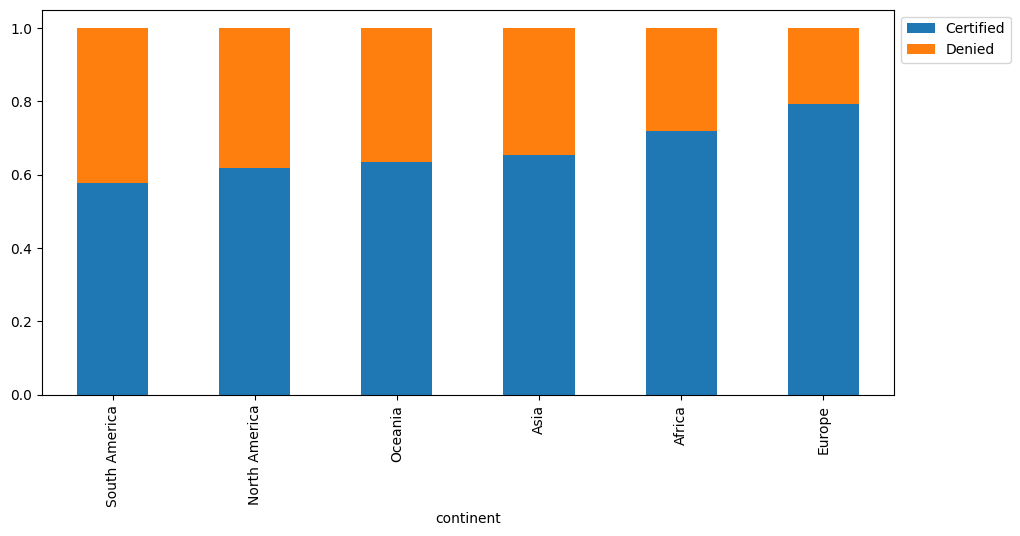

In [ ]:
stacked_barplot(df, 'continent', 'case_status')

* The visa status vary across different continents
* Applicants from Europe are the most likely to get certified, compare to Africa, Asia, Oceania North or South America

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


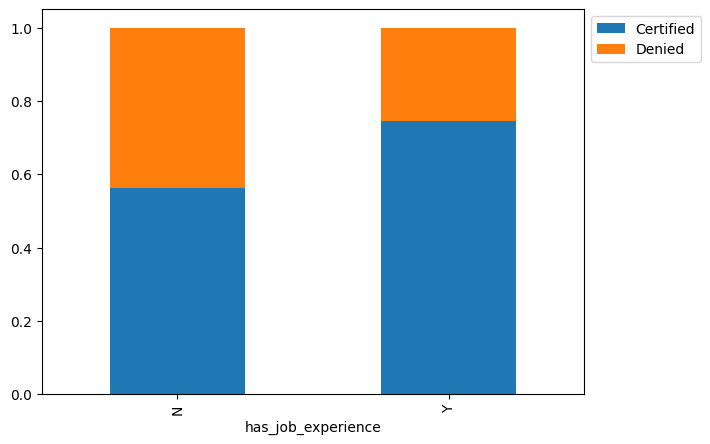

In [ ]:
stacked_barplot(df, 'has_job_experience', 'case_status')

* We notice that the proffesionals with work experience have higher acceptance rate

#### Checking if the prevailing wage is similar across all the regions of the US

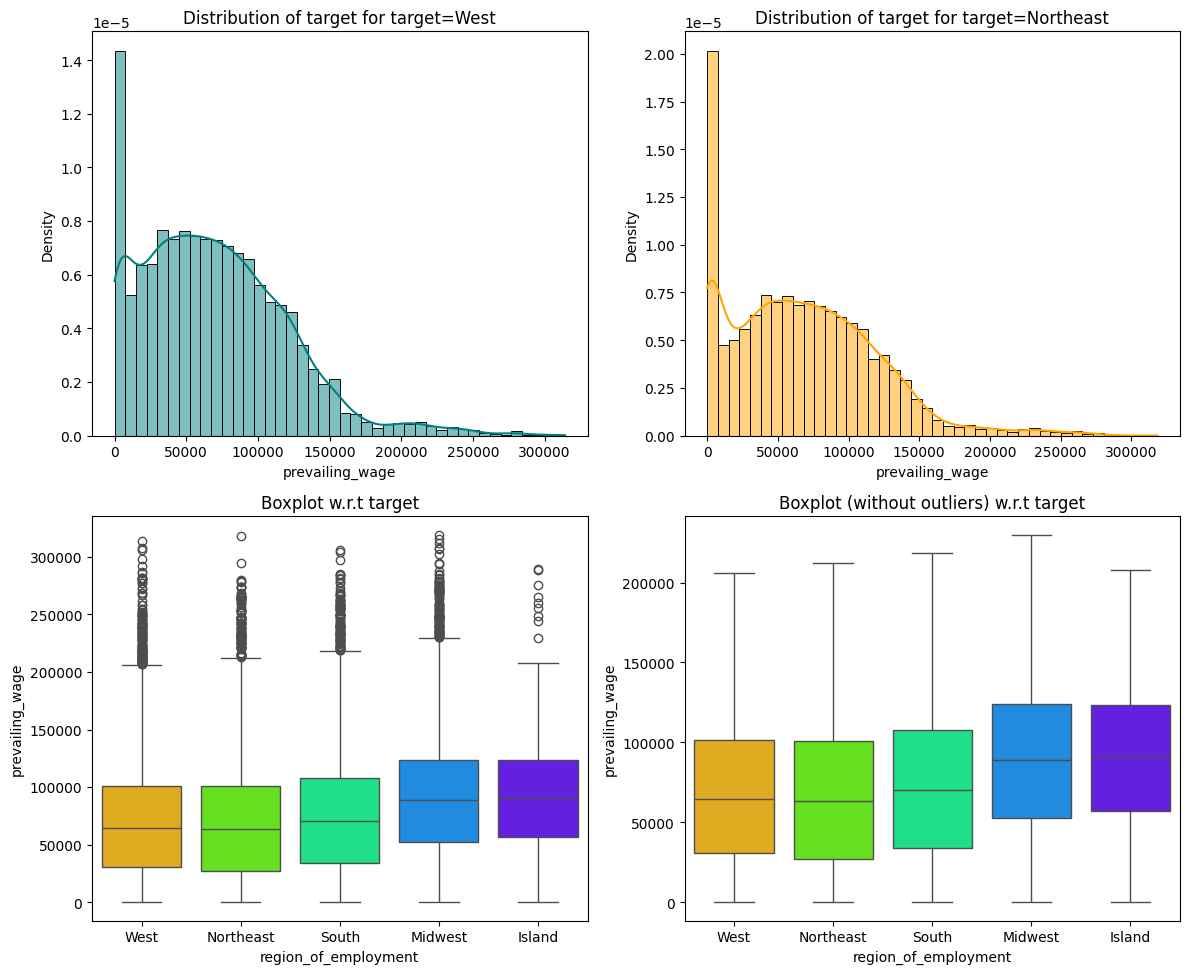

In [ ]:
distribution_plot_wrt_target(df, 'prevailing_wage', 'region_of_employment')

* Midwest and Island regions has highest wages, compare to West, Northeast and South with lower wages
* There are a lot of outliers to all the wages from different regions

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

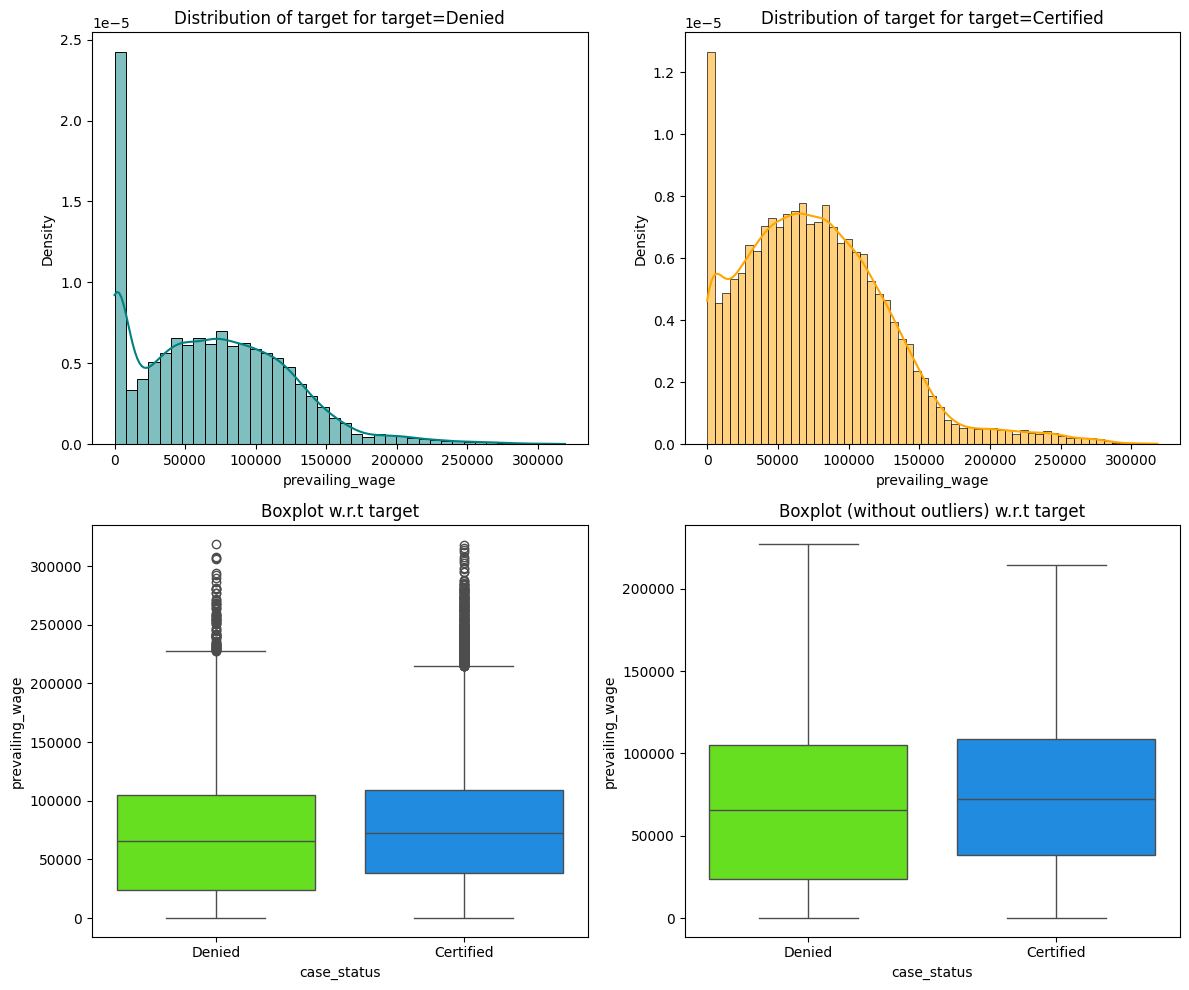

In [ ]:
distribution_plot_wrt_target(df, 'prevailing_wage', 'case_status')

* Aplicants with higher wages are more likely to get Certified visa
* Also there are a lot of outliers on both of the distributions

* Applicants with higher wages are more likely to certified
8

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


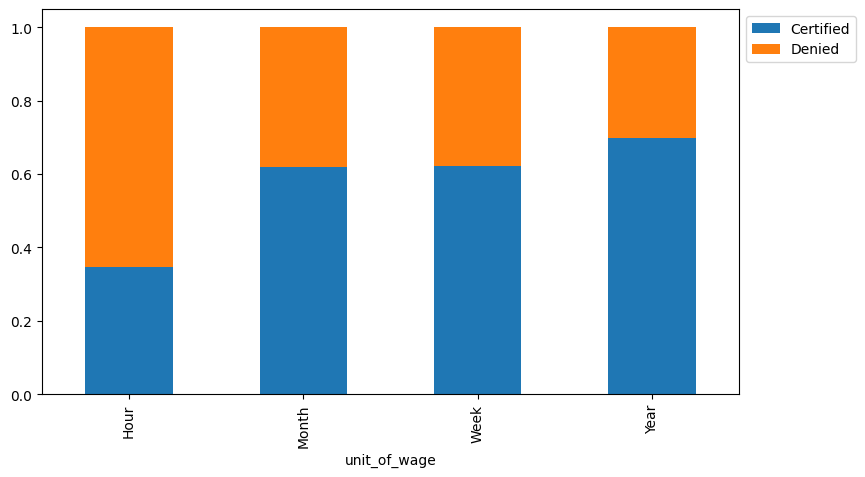

In [ ]:
stacked_barplot(df, 'unit_of_wage', 'case_status')

* Applications with Year, Month, Week units are more likely to get certified, in compare to Hour units which are more likely to get Denied

## Data Pre-processing

### Outlier Check

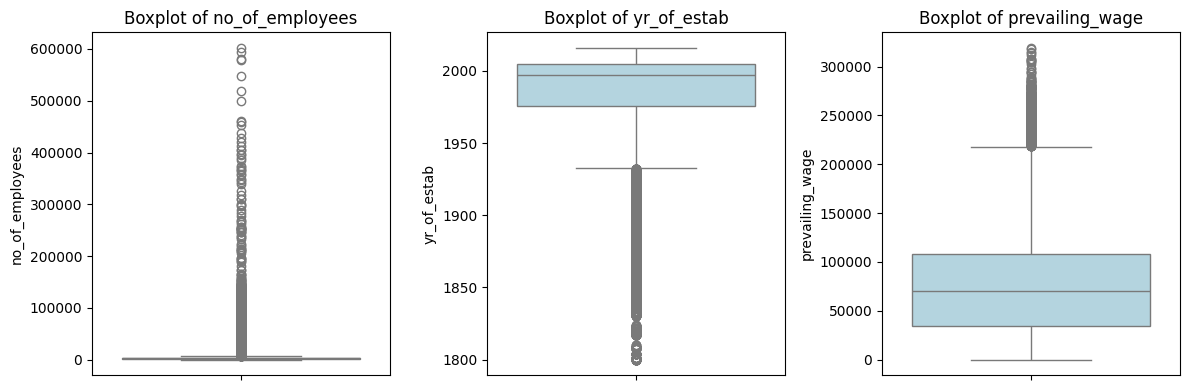

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

n_cols = 3
n_rows = (len(df_numeric.columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(df_numeric.columns):
    sns.boxplot(y=df_numeric[col], color='lightblue', ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

* The box plot reveals a significant number of outliers in the employee count, ranging from 10,000 to 600,000.
* The establishment year data contains outliers, particularly between 1800 and 1920.
* Prevailing wage data shows outliers starting at 220,000, extending beyond 300,000.

### Data Preparation for modeling

## Model Building

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
df['case_status'] = df['case_status'].replace({'Denied': 0, 'Certified': 1})

X = pd.get_dummies(df.drop(["case_status","case_id"], axis=1), drop_first=True)
y = df["case_status"]

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


In [ ]:
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.203,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
1,2412,2002,83425.650,True,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True
2,44444,2008,122996.860,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True
3,98,1897,83434.030,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
4,1082,2005,149907.390,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,True


#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
#  United States are facing high demand for human resources, hence the best metric score is recall. Because we don't want to identify wrong the right talent
scorer = metrics.make_scorer(metrics.recall_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

for name, model in models:
    model.fit(X_train, y_train)
    print('---',name,'---')
    print('Training')
    print(model_performance_classification_sklearn(model, X_train, y_train))
    print('Validation')
    print(model_performance_classification_sklearn(model, X_val, y_val))
    print()
    print()


--- Bagging ---
Training
   Accuracy  Recall  Precision    F1
0     0.986   0.989      0.990 0.990
Validation
   Accuracy  Recall  Precision    F1
0     0.701   0.783      0.772 0.778


--- Random forest ---
Training
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Validation
   Accuracy  Recall  Precision    F1
0     0.727   0.842      0.771 0.805


--- GBM ---
Training
   Accuracy  Recall  Precision    F1
0     0.758   0.879      0.785 0.829
Validation
   Accuracy  Recall  Precision    F1
0     0.755   0.873      0.785 0.827


--- Adaboost ---
Training
   Accuracy  Recall  Precision    F1
0     0.740   0.888      0.762 0.820
Validation
   Accuracy  Recall  Precision    F1
0     0.738   0.881      0.764 0.818


--- Xgboost ---
Training
   Accuracy  Recall  Precision    F1
0     0.852   0.941      0.853 0.895
Validation
   Accuracy  Recall  Precision    F1
0     0.734   0.853      0.772 0.810


--- dtree ---
Training
   Accuracy  Recall  Precision    F1
0     1

In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9888, Validation Score: 0.7832, Difference: 0.2056
Random forest: Training Score: 1.0000, Validation Score: 0.8422, Difference: 0.1578
GBM: Training Score: 0.8789, Validation Score: 0.8734, Difference: 0.0056
Adaboost: Training Score: 0.8882, Validation Score: 0.8807, Difference: 0.0075
Xgboost: Training Score: 0.9412, Validation Score: 0.8528, Difference: 0.0884
dtree: Training Score: 1.0000, Validation Score: 0.7479, Difference: 0.2521


* Decision Tree, Random Forest and bagging are overfitting in the training data
* Boosting Models (GBM, AdaBoost, and XGBoost) are generalizing well in both training and validation

### Model Building with oversampled data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


for name, model in models:
    model.fit(X_train, y_train)
    print('---',name,'---')
    print('Training')
    print(model_performance_classification_sklearn(model, X_train_over, y_train_over))
    print('Validation')
    print(model_performance_classification_sklearn(model, X_val, y_val))
    print()
    print()



--- Bagging ---
Training
   Accuracy  Recall  Precision    F1
0     0.899   0.989      0.838 0.907
Validation
   Accuracy  Recall  Precision    F1
0     0.701   0.783      0.772 0.778


--- Random forest ---
Training
   Accuracy  Recall  Precision    F1
0     0.892   1.000      0.822 0.903
Validation
   Accuracy  Recall  Precision    F1
0     0.727   0.842      0.771 0.805


--- GBM ---
Training
   Accuracy  Recall  Precision    F1
0     0.677   0.879      0.626 0.731
Validation
   Accuracy  Recall  Precision    F1
0     0.755   0.873      0.785 0.827


--- Adaboost ---
Training
   Accuracy  Recall  Precision    F1
0     0.645   0.888      0.598 0.715
Validation
   Accuracy  Recall  Precision    F1
0     0.738   0.881      0.764 0.818


--- Xgboost ---
Training
   Accuracy  Recall  Precision    F1
0     0.774   0.941      0.705 0.806
Validation
   Accuracy  Recall  Precision    F1
0     0.734   0.853      0.772 0.810


--- dtree ---
Training
   Accuracy  Recall  Precision    F1
0     0

In [ ]:
print("\nTraining and Validation Performance Difference:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}".format(name, scores_train, scores_val))




Training and Validation Performance Difference:

Bagging: Training Score: 0.9826, Validation Score: 0.7532
Random forest: Training Score: 0.9999, Validation Score: 0.8126
GBM: Training Score: 0.8536, Validation Score: 0.8464
Adaboost: Training Score: 0.8841, Validation Score: 0.8825
Xgboost: Training Score: 0.9162, Validation Score: 0.8496
dtree: Training Score: 1.0000, Validation Score: 0.7153


* Models have higher recall, but precision slightly decreased
* Decision Tree and Random Forest have lower accuracy in training data (~0.89), rathen than the original data, which means that they are generalizing better
* GBM, AdaBoost, and XGBoost continue to perform well in validation
* We notice that the models have higher recall, which is beneficial for the visa approval predictions.

### Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9686884600236314
Random forest: 1.0
GBM: 0.7479322567940134
Adaboost: 0.715833005120126
dtree: 1.0

Validation Performance:

Bagging: 0.6178025851938895
Random forest: 0.6745005875440658
GBM: 0.7291421856639247
Adaboost: 0.7159224441833137
dtree: 0.631316098707403


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9687, Validation Score: 0.6178, Difference: 0.3509
Random forest: Training Score: 1.0000, Validation Score: 0.6745, Difference: 0.3255
GBM: Training Score: 0.7479, Validation Score: 0.7291, Difference: 0.0188
Adaboost: Training Score: 0.7158, Validation Score: 0.7159, Difference: -0.0001
dtree: Training Score: 1.0000, Validation Score: 0.6313, Difference: 0.3687


* Significant Drop in validation performance
* GBM and AdaBoost still perform relativelly well

### General Observations
* Overfitting in Some Models: Decision Tree and Random Forest are overfitting in the training data
* Gradient Boosting and AdaBoost Perform well: They have a good balance between training and validation performance
* XGBoost have the best results: Achieves high recall, while maintaining good precision
* Data Sampling impact performance: Oversampling improves recall and reduce precision, while undersampling reduces the validation performance

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=20, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv = randomized_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
tuned_adb = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
tuned_adb.fit(X_train_over, y_train_over)

CPU times: user 676 ms, sys: 102 ms, total: 779 ms
Wall time: 34.8 s


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=10, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_over, y_train_over)
adb_train

,Accuracy,Recall,Precision,F1
0,0.647,0.931,0.593,0.725


In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.716,0.934,0.722,0.815


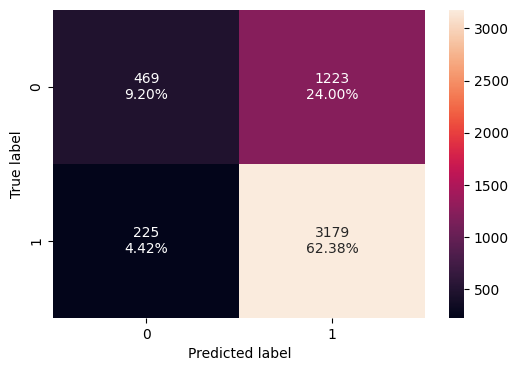

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(tuned_adb,X_val, y_val)

* The AdaBoost model generalizes well, hence there is no overfitting between training and validation performance.
* Despite a high recall of 93.4%, the model may still misclassify some negative cases, because of the precision (72.2%)

### Tuning Random forest using undersampled data

In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 250, 500, 750],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.7, 0.9, "log2", "sqrt", "auto"],
    "max_samples": [0.7, 0.9, None],
    "bootstrap": [True, False],
    "class_weight": ["balanced", "balanced_subsample", None],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=20, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv = randomized_cv.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
tuned_rf = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
tuned_rf.fit(X_train_over, y_train_over)

CPU times: user 3.02 s, sys: 133 ms, total: 3.16 s
Wall time: 1min 32s


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=3, min_samples_split=10,
                       random_state=1)

In [ ]:
# Checking model's performance on training set
rf_train = model_performance_classification_sklearn(tuned_rf, X_train_un, y_train_un)
rf_train

,Accuracy,Recall,Precision,F1
0,0.702,0.870,0.651,0.745


In [ ]:
# Checking model's performance on validation set
rf_val = model_performance_classification_sklearn(tuned_rf, X_val, y_val)
rf_val

,Accuracy,Recall,Precision,F1
0,0.749,0.859,0.786,0.821


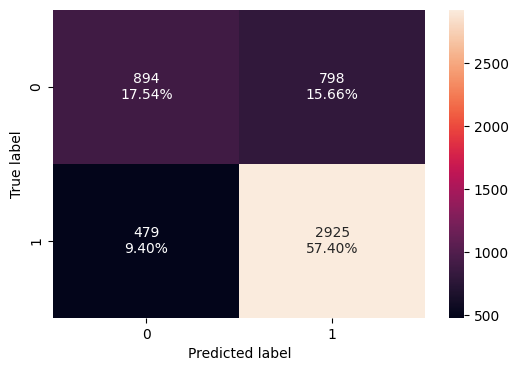

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(tuned_rf,X_val, y_val)



*   Validation recall is a little bit lower than the training recall, this means we have minimum overfitting

### Tuning with Gradient boosting with oversampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv = randomized_cv.fit(X_train_over,y_train_over)


#Fitting parameters in RandomizedSearchCV
tuned_gbm1 = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
tuned_gbm1.fit(X_train_over, y_train_over)

CPU times: user 6.61 s, sys: 204 ms, total: 6.81 s
Wall time: 2min 2s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=1)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_over, y_train_over
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.762,0.894,0.708,0.790


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.736,0.895,0.755,0.819


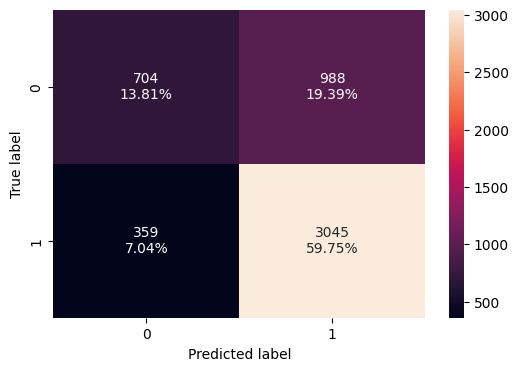

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(tuned_gbm1,X_val, y_val)

* Recall Remains high in training and evaluation data, indicating that the model have minimum overfitting and handles effectively positive cases

### Tuning XGBoost using oversampled data

In [ ]:
Model = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
param_grid = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Run the grid search
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=20, scoring=scorer, cv=5, random_state=1, n_jobs = -1)
randomized_cv = randomized_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
xgb_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.505   1.000      0.502 0.669
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.668   1.000      0.668 0.801


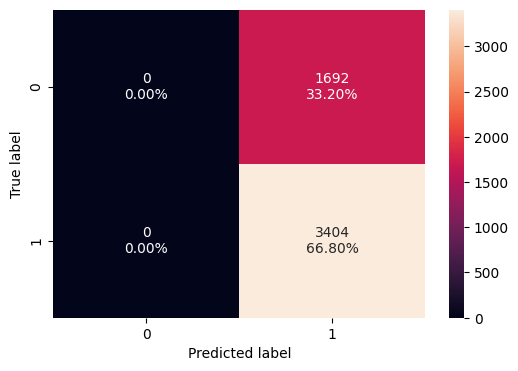

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train_over,y_train_over)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_eval_perf=model_performance_classification_sklearn(xgb_tuned,X_val, y_val)
print("Testing performance:\n",xgb_tuned_model_eval_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_val, y_val)

* Recall is 100% in both training and evaluation, this result isn't very good because the model probably is biased towards predicting positives

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        adb_train.T,
        rf_train.T,
        gbm1_train.T,
        xgb_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuning AdaBoost using oversampled data",
    "Tuning Random forest using undersampled data",
    "Tuning with Gradient boosting with oversampled data",
    "Tuning XGBoost using oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Tuning AdaBoost using oversampled data,Tuning Random forest using undersampled data,Tuning with Gradient boosting with oversampled data,Tuning XGBoost using oversampled data
Accuracy,0.647,0.702,0.762,0.505
Recall,0.931,0.870,0.894,1.000
Precision,0.593,0.651,0.708,0.502
F1,0.725,0.745,0.790,0.669


In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        adb_val.T,
        rf_val.T,
        gbm1_val.T,
        xgb_tuned_model_eval_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Tuning AdaBoost using oversampled data",
    "Tuning Random forest using undersampled data",
    "Tuning with Gradient boosting with oversampled data",
    "Tuning XGBoost using oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Tuning AdaBoost using oversampled data,Tuning Random forest using undersampled data,Tuning with Gradient boosting with oversampled data,Tuning XGBoost using oversampled data
Accuracy,0.716,0.749,0.736,0.668
Recall,0.934,0.859,0.895,1.000
Precision,0.722,0.786,0.755,0.668
F1,0.815,0.821,0.819,0.801


* XGBoost may overfitting, because it achieves perfect recall but it sacrifices precision
* Gradient Boosting have the best balanced score with high recall, and better generalization
* Random Forest also genralize well with high validation accuracy and balanced precision and recall
* AdaBoost has a high recall, but lower precision, which means that may not be the best model for minimizing false positives

In [ ]:
# Let's check the performance on test set
# We choose Gradient Boosting with Oversampled data because has the best generalization of performance
Model_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
Model_test

,Accuracy,Recall,Precision,F1
0,0.723,0.891,0.744,0.811


* Recall and precision remains high, which means the model generalized well in training,test and evaluation data
* The high recall idicates that our model is good for positive cases, which in our situation is crucial because we don't want to deny good talents

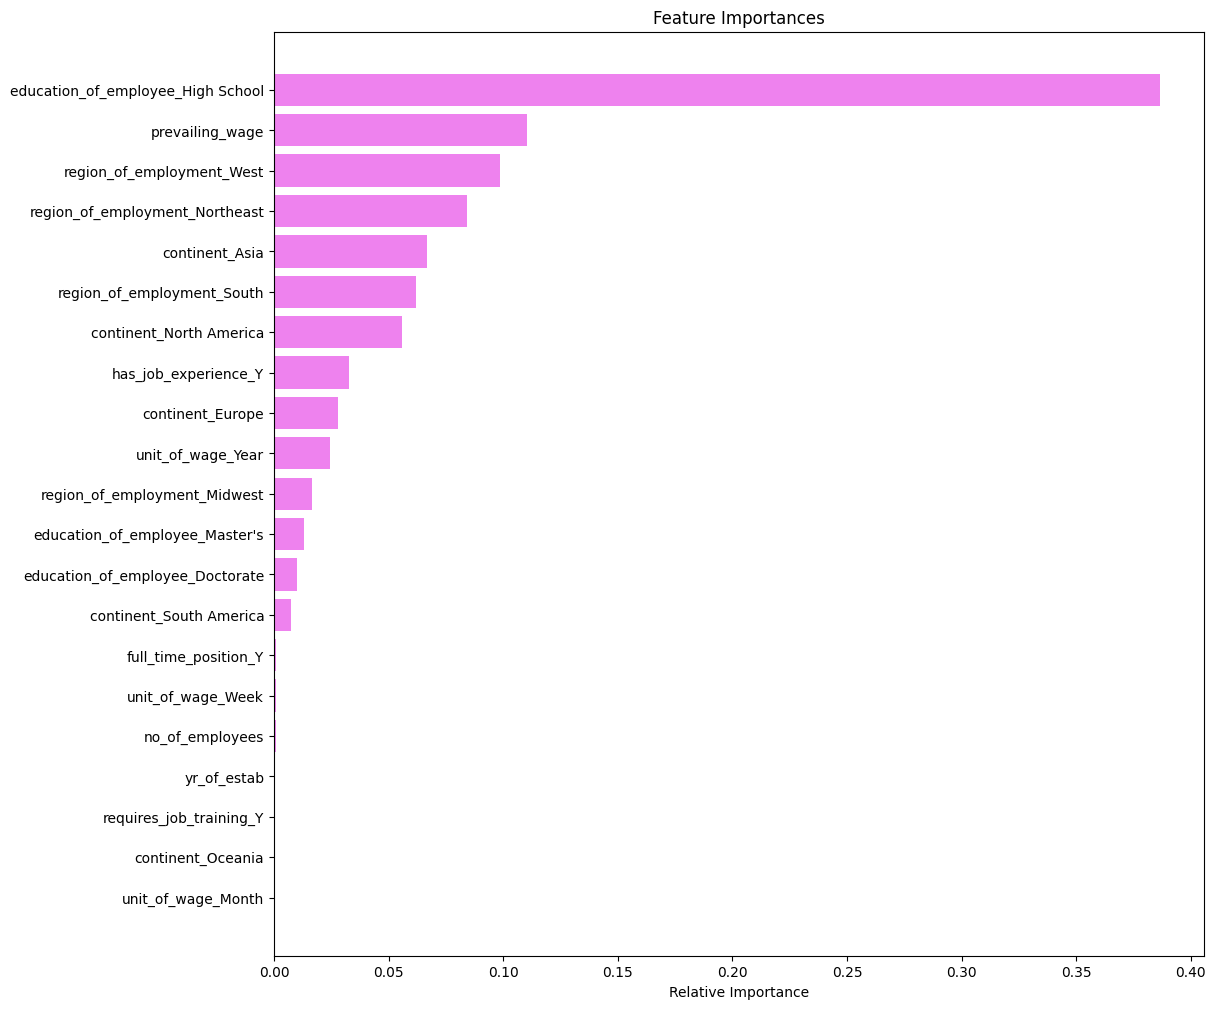

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features of the Gradient Boosting Model is the education of the employee, the prevailing wage and the region.

## Actionable Insights and Recommendations

* Focus on recall for visa approval: High recall models like AdaBoost and XGBoost are better for identifying approvals
* Address Overfitting issues: The models Decision Trees and Random Forest are overfitting in the training data. You can regularize them using techniques like pruning etc.
* Balance Precision and Recall: While XGBoost achieves 100% recall, its lower precision suggests many false positives. Adjusting thresholds or incorporating cost-sensitive learning could improve balance.
* Enhance Data Preprocessing: Outliers in attributes like employee count, year of establishment, and prevailing wage impact model performance. Addressing these through transformation or capping may improve results.
* Optimize Feature Engineering: Exploring additional features, such as employer reputation or industry trends, could enhance predictive accuracy and generalization.

<font size=6 color='blue'>Power Ahead</font>
___